In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import yfinance as yf
import matplotlib.pyplot as plt 

In [2]:
# Download stock price data
def download_stock_data(ticker:str, start_date:str, end_date:str) -> pd.Series:
    stock_data = yf.download(ticker,start=start_date, end=end_date)
    return stock_data['Close']

In [3]:
# Preprocess data and create input sequences
def preprocess_data(data: pd.Series, sequence_length: int):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length].values
        target = data[i+sequence_length]
        sequences.append((sequence, target))
    return sequences

In [4]:
# Split data into training and testing sets
def split_data(data, test_size=0.2):
    return train_test_split(data,
                            test_size=test_size,
                            shuffle=False)

In [5]:
# Train linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [6]:
# Evaluate model on test data
def evaluate_model(model: LinearRegression | None, X_test, y_test):
    return mean_squared_error(y_test,model.predict(X_test))

In [7]:
def get_current_price(symbol:str):
    todays_data = yf.Ticker(symbol).history(period='1d')
    return todays_data['Close'].iloc[0]

In [8]:
start_date = '2010-05-4'
end_date = '2024-06-4'
ticker="AMZN"

In [9]:
current_price = get_current_price(ticker)

In [10]:
stock_data = download_stock_data(ticker, start_date, end_date)
stock_data

[*********************100%%**********************]  1 of 1 completed


Date
2010-05-04      6.491500
2010-05-05      6.546500
2010-05-06      6.435500
2010-05-07      6.249000
2010-05-10      6.564500
                 ...    
2024-05-28    182.149994
2024-05-29    182.020004
2024-05-30    179.320007
2024-05-31    176.440002
2024-06-03    178.339996
Name: Close, Length: 3545, dtype: float64

In [11]:
#current_price=get_current_price(ticker)

# Preprocess data
sequence_length = 10
data_sequences = preprocess_data(stock_data,sequence_length)
print(data_sequences)

# Split data into training and testing sets
train_data, test_data = split_data(data_sequences)

# Prepare training data
X_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])

# Prepare testing data
X_test = np.array([item[0] for item in test_data])
y_test = np.array([item[1] for item in test_data])

# Train linear regression model
model = train_model(X_train, y_train)

/tmp/ipykernel_25397/2743888461.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data[i+sequence_length]


[(array([6.4914999 , 6.54650021, 6.43550014, 6.24900007, 6.56449986,
       6.52299976, 6.69350004, 6.57350016, 6.42649984, 6.4454999 ]), 6.314000129699707), (array([6.54650021, 6.43550014, 6.24900007, 6.56449986, 6.52299976,
       6.69350004, 6.57350016, 6.42649984, 6.4454999 , 6.31400013]), 6.229499816894531), (array([6.43550014, 6.24900007, 6.56449986, 6.52299976, 6.69350004,
       6.57350016, 6.42649984, 6.4454999 , 6.31400013, 6.22949982]), 5.985499858856201), (array([6.24900007, 6.56449986, 6.52299976, 6.69350004, 6.57350016,
       6.42649984, 6.4454999 , 6.31400013, 6.22949982, 5.98549986]), 6.136000156402588), (array([6.56449986, 6.52299976, 6.69350004, 6.57350016, 6.42649984,
       6.4454999 , 6.31400013, 6.22949982, 5.98549986, 6.13600016]), 6.105999946594238), (array([6.52299976, 6.69350004, 6.57350016, 6.42649984, 6.4454999 ,
       6.31400013, 6.22949982, 5.98549986, 6.13600016, 6.10599995]), 6.243000030517578), (array([6.69350004, 6.57350016, 6.42649984, 6.4454999 , 6

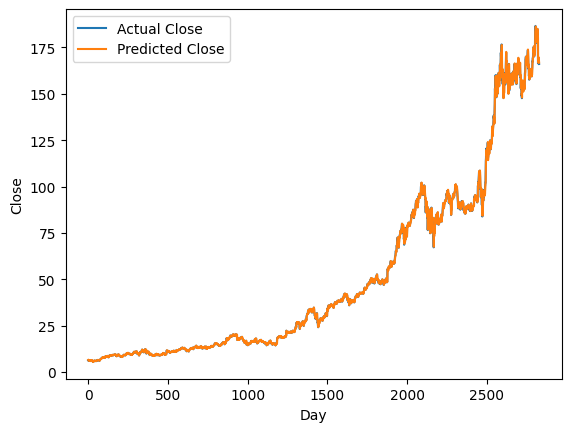

In [12]:
predicted = model.predict(X_train)

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [13]:
# Example of using the trained model for prediction
last_sequence = X_test[-1].reshape(1, -1)
predicted_price = model.predict(last_sequence)[0]
print(f'{ticker} Stock Prices')
print(f'\nStock Price Now: {current_price: 0.2f}')
print(f'Predicted Stock Price: {predicted_price: 0.2f}')

# Evaluate model using Mean Squared Error
mse = evaluate_model(model, X_test, y_test)

# Evaluate model using R-squared
r2 = r2_score(y_test, model.predict(X_test))

# Calculate Adjusted R-squared (adjusts for number of features)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the R-squared and adjusted R-squared
#print(f'R-squared: {r2:.4f}')
#print(f'Adjusted R-squared: {adjusted_r2:.2f}')
print(f'Mean Squared Error on Test Data: {mse: 0.2f}')

AMZN Stock Prices

Stock Price Now:  197.20
Predicted Stock Price:  176.75
Mean Squared Error on Test Data:  9.77
